# Data Analysis of Movies Data Set

In this notebook I have analyzed movies dataset. Initially with some basic analysis using vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 

## Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset. Here I have Parsed the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html).

In [8]:
# import the csv library
import csv
# initialize the top-level array
movies = []
header = []

with open('movies.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in filereader:
        movies.append(row)
header = movies.pop(0)
for row in movies: 
    row[5] = float(row[5])
    row[6] = int(row[6])
    try:
        row[17] = str(row[17])
    except ValueError: 
        row[17] = None

print("Header: ",header)
print("Row in movies: ",movies[5])
print("Number of Column",len(header))
print("Number of Rows",len(movies))

Header:  ['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
Row in movies:  ['6', '$pent', '2000', '91', 'NA', 4.3, 45, '4.5', '4.5', '4.5', '14.5', '14.5', '14.5', '4.5', '4.5', '14.5', '14.5', '', '0', '0', '0', '1', '0', '0', '0']
Number of Column 25
Number of Rows 58788


### Calculate movie stats like average ratings, average rating for major movies and finding the highest rated major movie

Here I have calculated some statistics about movies. 

In [9]:
# your code goes here
#Task 1.2.1 Calcualte average ratings
#Task 1.2.2: Calculate average rating for major movies
#Task 1.2.3: Find the highest rated major movie
summ=0
count=0
summ1=0
count1=0
count2=0
rating=0
for row in movies:
    summ=summ+row[5]
    count=count+1
    #major movies
    if row[6]>500:
        summ1=summ1+row[5]
        count1=count1+1
        if row[5]>rating:
            rating=row[5]
            count2=count-1
    else:
        continue

print("Average rating: ",summ/count,", "+"Number of movies: "+str(count))
print("Average rating of movies with more than 500 votes:",summ1/count1,"Number of major movies: ",count1)
print("Highest rating: ",rating,"Title: ",movies[count2][1])

Average rating:  5.932850241545932 , Number of movies: 58788
Average rating of movies with more than 500 votes: 6.370579126664578 Number of major movies:  6458
Highest rating:  9.1 Title:  Godfather, The


**Interpretation**: 
1. Major movies are just 10% of all the movies
                        
2. If we see the average rating, the Major movies have a significantly                                   higher rating than average movies, which tells us they are usually better.

## Using Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

###  Loading data
Read in the data again. This time by creating a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). 

In [135]:
# import pansas and numpy
import pandas as pd
import numpy as ny
# your code goes here
movies_pd=pd.read_csv("movies.csv")
movies_pd.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [4]:
# print data types
movies_pd.dtypes

Unnamed: 0       int64
title           object
year             int64
length           int64
budget         float64
rating         float64
votes            int64
r1             float64
r2             float64
r3             float64
r4             float64
r5             float64
r6             float64
r7             float64
r8             float64
r9             float64
r10            float64
mpaa            object
Action           int64
Animation        int64
Comedy           int64
Drama            int64
Documentary      int64
Romance          int64
Short            int64
dtype: object

**Interpretation**: 
1. I loaded 58788 rows and 25 columns
2. The columns have 3 types of datatype: int64, object and float64
3. No, we dont have to do any manual data type conversions

###  Calculate the average rating
Compute the average rating for all movies using the library.

In [5]:
# your code goes here
print("Average rating: ",movies_pd["rating"].mean())

Average rating:  5.932850241545932


### Comparing the runtime

We measure runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop to see how librarires astronomically decrease the computaional time.

In [136]:
import time
# your code goes here
summ=0
count=0

t1=time.clock()
print("Average in pandas",movies_pd["rating"].mean())
t2=time.clock()

t3=time.clock()
for index, row in movies_pd.iterrows():
    summ=summ+row['rating']
    count=count+1
print("Average in loop",summ/count)    
t4=time.clock()

print("time using own code:",t4-t3)
print("time using Pandas:",t2-t1)
print("difference factor:",(t4-t3)-(t2-t1))

Average in pandas 5.932850241545932
Average in loop 5.932850241545932
time using own code: 12.369620144709188
time using Pandas: 0.004248281720720115
difference factor: 12.365371862988468


###  Filtering out , Calculate the average rating for major movies, find highest rated major movies,Filter out rows and count specific features

The whole movies dataset has about 60k entries. Using pandas I filtered out the dataframe to contain only the major movies with more than 500 votes. and calculated various statistics.

From the major movies I got the count for  
 * comedies.
 * dramas
 * and both, comedies and dramas

In [11]:
# your code goes here
No=0
mask=movies_pd["votes"]>500
major_movies=movies_pd[mask]
No=len(major_movies.axes[0])
print(No,"movies have more than 500 votes.")

6458 movies have more than 500 votes.


In [12]:
# your code goes here
print("Average rating of movies with more than 500 votes: ",major_movies["rating"].mean())

Average rating of movies with more than 500 votes:  6.370579126664578


In [13]:
# your code goes here
k=major_movies["rating"].idxmax()
print("Highest rated movie: ",major_movies.loc[k][1],",","rating",major_movies.loc[k][5])


Highest rated movie:  Godfather, The , rating 9.1


In [23]:
# your code goes here
a=0
b=0
c=0
mask1=major_movies["Comedy"]==1
mask2=major_movies["Drama"]==1
major_movies.describe()
major_movies_comedies=major_movies[mask1]
major_movies_drama=major_movies[mask2]
major_movies_cd=major_movies[(major_movies['Comedy']==1)&(major_movies['Drama']==1)]
#major_movies_cd=major_movies[mask3]

a=len(major_movies_comedies.axes[0])
b=len(major_movies_drama.axes[0])
c=len(major_movies_cd.axes[0])
print(a,"major movies are comedies.")
print(b,"major movies are dramas.")
print(c,"major movies are both, comedies and dramas")

2553 major movies are comedies.
3370 major movies are dramas.
814 major movies are both, comedies and dramas


### Compare ratings of different categories

I compared the ratings for comedies and dramas for major movies by computing the average rating, maximum rating, minimum rating, standard deviation, and the median for each category.

In [125]:
# your code goes here
print("Comedy Description")
k1=major_movies_comedies["rating"].describe()
print(k1,"\n")
print("Drama Description")
k2=major_movies_drama["rating"].describe()
print(k2)

Comedy Description
count    6458.000000
mean        6.370579
std         1.220332
min         1.300000
25%         5.700000
50%         6.600000
75%         7.300000
max         9.100000
Name: rating, dtype: float64 

Drama Description
count    3370.000000
mean        6.749614
std         0.990969
min         1.300000
25%         6.200000
50%         6.900000
75%         7.500000
max         9.100000
Name: rating, dtype: float64


**Interpretation**: The mean ratings are higher for Drama movies, also the ratings vary less for Drama movies from the mean. The max and min ratings for both are same 9.1 and 1.3 respectively. 
Drama has a median rating of 6.9 and Comedy 6.6 this tells us half of the Drama movies have higher rating than comedy. Bottom line, among the major movies , Drama have higher ratings than Comedy.

### Showing Movies per year using line charts

In [89]:
# your code goes here
import numpy as ny
grouped= major_movies.groupby("year")
grouped.groups
movies_grp=grouped.size()
df_mov_grp=movies_grp.to_frame()
df_mov_grp.columns=['number of movies']
df_mov_grp

,number of movies
year,
1902,1
1903,1
1915,1
1916,1
1917,1
1919,1
1920,1
1921,1
1922,3


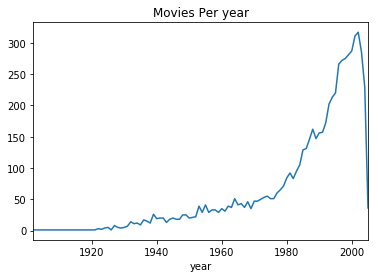

In [34]:
%matplotlib inline
# create the plot here
movies_grp.plot(title="Movies Per year")

### Computing Yearly average 

        rating
year          
1902  8.200000
1903  7.400000
1915  7.100000
1916  7.800000
1917  7.900000
1919  7.400000
1920  8.100000
1921  8.200000
1922  7.933333
1923  8.050000
1924  8.050000
1925  8.000000
1926  8.400000
1927  7.750000
1928  8.020000
1929  7.400000
1930  7.520000
1931  7.871429
1932  7.557143
1933  7.654545
1934  7.541667
1935  7.777778
1936  7.329412
1937  7.626667
1938  7.733333
1939  7.569231
1940  7.721053
1941  7.510000
1942  7.635000
1943  7.523077
...        ...
1976  6.554902
1977  6.480000
1978  6.275385
1979  6.587324
1980  6.228571
1981  6.252174
1982  6.378313
1983  6.177895
1984  6.096190
1985  6.010853
1986  5.940458
1987  6.012329
1988  5.981481
1989  5.981633
1990  5.904487
1991  6.085350
1992  6.141279
1993  6.009901
1994  5.928638
1995  6.123182
1996  6.022932
1997  6.036765
1998  6.172727
1999  6.266904
2000  6.266899
2001  6.303859
2002  6.321136
2003  6.347719
2004  6.303493
2005  5.458333

[92 rows x 1 columns]


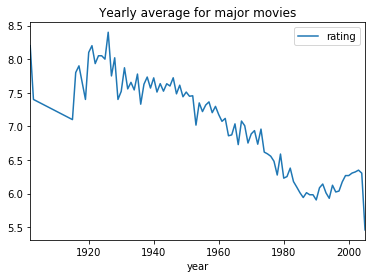

In [128]:
# your code goes here
%matplotlib inline
major_yr = major_movies[["year","rating"]]
group_rating= major_yr.groupby("year").mean()
x1=group_rating
print(x1)
group_rating.plot(title="Yearly average for major movies")


### Exploration and Interpretation



Based on the plot for average rating vs year we can infer that older movies have higher rating which tells us old movies are better. Yes there is a difference between rating for all and major movies overtime as you can see in the plot below, but the rating for older movies remain better than new movies. The difference in rating can also be a result of increased number of votes in recent times.

if we see the plot for total number of votes per year, in recent years the votes are predominantly higher, which also accounts for more accurate ratings. 

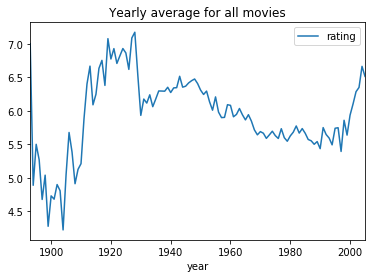

In [129]:
# avg rating over the time
%matplotlib inline
movies_over = movies_pd[["year","rating"]]
grp_over= movies_over.groupby("year").mean()
grp_over.plot(title="Yearly average for all movies")

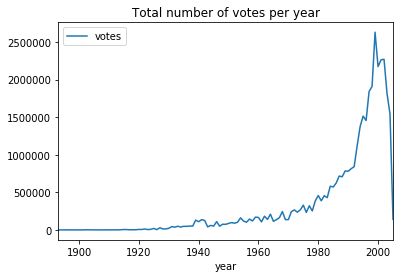

In [134]:
#Total number of votes per year
%matplotlib inline
tot_mov = movies_pd[["year","votes"]]
grp_vot= tot_mov.groupby("year").sum()
grp_vot.plot(title="Total number of votes per year")